In [14]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


from simulator import simulator
from ads import ADS

# Varying parameters

In [53]:
df = pd.read_csv("results/sim3_prop_rock.csv")
path = "figs/sim3/"
df = df[df.pr_rock.isin([0.1, 0.2, 0.3, 0.4])]

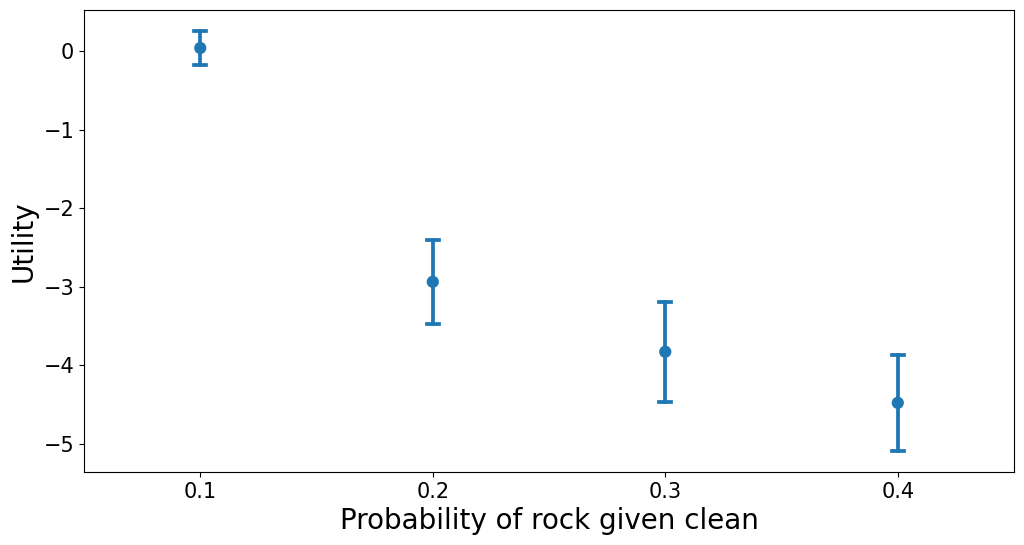

In [56]:
matplotlib.rc_file_defaults()
ax = sns.set_style(style=None, rc=None )

fig, ax = plt.subplots(figsize=(12,6))


#plot_ =  ax = sns.regplot(x="pr_rock", y="prop_manual", data=df)

plot_ = sns.pointplot(x="pr_rock", y="utility", ci="sd", data=df, join=False, capsize=.05)
ax.set_xlabel('Probability of rock given clean', fontsize=20)
ax.set_ylabel('Utility', fontsize=20)
ax.tick_params(labelsize=15)



plt.show()

#plot_.figure.savefig("figs/env_state.png")

In [ ]:
df[df.pro]

# Driver and Environment State plot

In [56]:
def simulate(N):

    sim = simulator(N)
    env = sim.simulate_environment()
    road = env["road"]
    char = env["driver_char"]
    driver = env["driver"]


    driver_state_evol = pd.read_csv("data/driver_state_evol", delim_whitespace=True)
    driver_state_evol.set_index(["Current", "Obstacle"], inplace=True)
    driver_char = pd.read_csv("data/driver_char", index_col=0, delim_whitespace=True)

    ads = ADS(road, char, driver, driver_char, driver_state_evol)
    prob_driver_state = np.zeros(ads.N) + 100

    p_rock_rock = np.zeros(ads.N) + 100
    p_rock_puddle = np.zeros(ads.N) + 100
    p_rock_clean = np.zeros(ads.N) + 100

    p_puddle_rock = np.zeros(ads.N) + 100
    p_puddle_puddle = np.zeros(ads.N) + 100
    p_puddle_clean = np.zeros(ads.N) + 100

    p_clean_rock = np.zeros(ads.N) + 100
    p_clean_puddle = np.zeros(ads.N) + 100
    p_clean_clean = np.zeros(ads.N) + 100


    for i in range(ads.N - 6):

        #if i % 100 == 0:
        #    print(i)

        prob_driver_state[i] = ads.prob_driver_state[1]

        preds = ads.normalize_arr(ads.Dir)
        p_rock_rock[i] = preds[0,0]
        p_rock_puddle[i] = preds[0,1]
        p_rock_clean[i] = preds[0,2]

        p_puddle_rock[i] = preds[1,0]
        p_puddle_puddle[i] = preds[1,1]
        p_puddle_clean[i] = preds[1,2]

        p_clean_rock[i] = preds[2,0]
        p_clean_puddle[i] = preds[2,1]
        p_clean_clean[i] = preds[2,2]

        ads.move()


    df_driver_state = pd.DataFrame({"cell": np.arange(0,N-6), "true_state": driver[0:N-6], "prob": prob_driver_state[0:N-6]} )

    df_env_state = pd.DataFrame({"cell": np.arange(0,N-6), "prr": p_rock_rock[0:N-6],
                                "prp": p_rock_puddle[0:N-6], "prc": p_rock_clean[0:N-6],
                                "ppr": p_puddle_rock[0:N-6], "ppp": p_puddle_puddle[0:N-6],
                                "ppc": p_puddle_clean[0:N-6],"pcr": p_clean_rock[0:N-6],
                               "pcp": p_clean_puddle[0:N-6], "pcc": p_clean_clean[0:N-6]})
    
    return df_env_state, df_driver_state

1
2
3
4


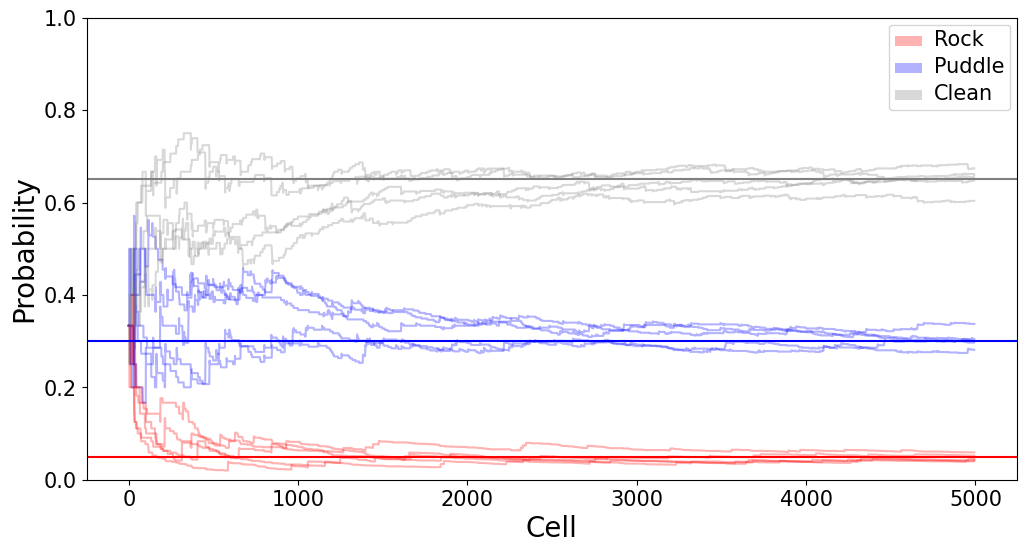

In [62]:
matplotlib.rc_file_defaults()
ax = sns.set_style(style=None, rc=None )

fig, ax = plt.subplots(figsize=(12,6))

df_env_state, _ = simulate(5000)

plot_ = sns.lineplot(df_env_state['cell'], df_env_state['prp'], sort = False, color='r', alpha=0.3)
sns.lineplot(df_env_state['cell'], df_env_state['ppp'], sort = False, color='b', alpha=0.3)
sns.lineplot(df_env_state['cell'], df_env_state['pcp'], sort = False, color='gray', alpha=0.3)

for i in np.arange(1,5):
    print(i)
    
    df_env_state, _ = simulate(5000)

    sns.lineplot(df_env_state['cell'], df_env_state['prp'], sort = False, color='r', alpha=0.3)
    sns.lineplot(df_env_state['cell'], df_env_state['ppp'], sort = False, color='b', alpha=0.3)
    sns.lineplot(df_env_state['cell'], df_env_state['pcp'], sort = False, color='gray', alpha=0.3)

plot_.axhline(0.05, color='r')
plot_.axhline(0.3, color='b')
plot_.axhline(0.65, color='gray')
#ax.xaxis.set_major_locator(plt.MaxNLocator(3))

ax.set_xlabel('Cell', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)
ax.tick_params(labelsize=15)


plt.ylim(0,1.0)

legend_elements = [Patch(facecolor='r', alpha=0.3,
                         label='Rock'), Patch(facecolor='b', alpha=0.3,
                         label='Puddle'), Patch(facecolor='gray', alpha=0.3,
                         label='Clean')]


ax.legend(handles=legend_elements)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text

plt.show()

plot_.figure.savefig("figs/env_state.png")

1
2
3
4


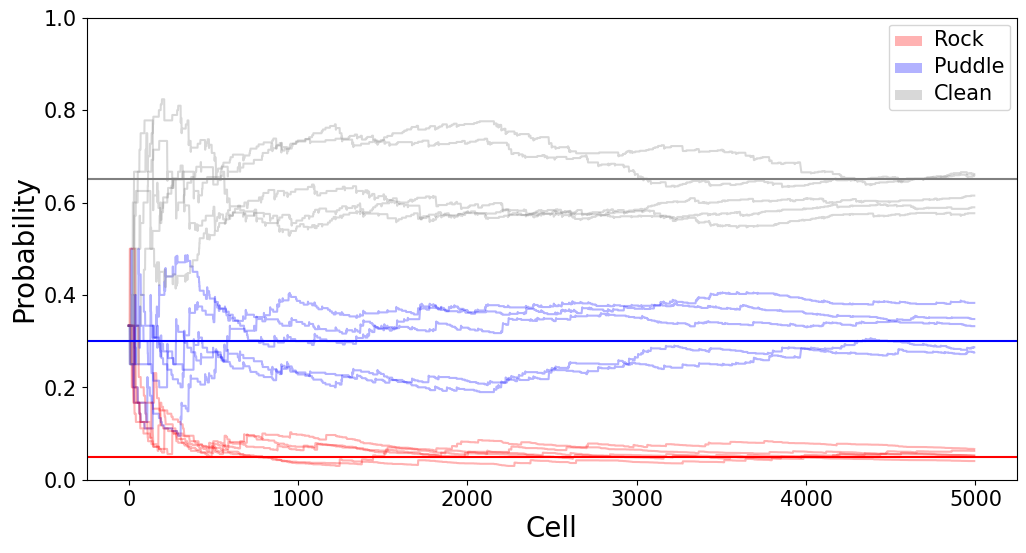

In [63]:
matplotlib.rc_file_defaults()
ax = sns.set_style(style=None, rc=None )

fig, ax = plt.subplots(figsize=(12,6))

df_env_state, _ = simulate(5000)

plot_ = sns.lineplot(df_env_state['cell'], df_env_state['prp'], sort = False, color='r', alpha=0.3)
sns.lineplot(df_env_state['cell'], df_env_state['ppp'], sort = False, color='b', alpha=0.3)
sns.lineplot(df_env_state['cell'], df_env_state['pcp'], sort = False, color='gray', alpha=0.3)

for i in np.arange(1,5):
    print(i)
    
    df_env_state, _ = simulate(5000)

    sns.lineplot(df_env_state['cell'], df_env_state['prp'], sort = False, color='r', alpha=0.3)
    sns.lineplot(df_env_state['cell'], df_env_state['ppp'], sort = False, color='b', alpha=0.3)
    sns.lineplot(df_env_state['cell'], df_env_state['pcp'], sort = False, color='gray', alpha=0.3)

plot_.axhline(0.05, color='r')
plot_.axhline(0.3, color='b')
plot_.axhline(0.65, color='gray')
#ax.xaxis.set_major_locator(plt.MaxNLocator(3))

ax.set_xlabel('Cell', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)
ax.tick_params(labelsize=15)


plt.ylim(0,1.0)

legend_elements = [Patch(facecolor='r', alpha=0.3,
                         label='Rock'), Patch(facecolor='b', alpha=0.3,
                         label='Puddle'), Patch(facecolor='gray', alpha=0.3,
                         label='Clean')]


ax.legend(handles=legend_elements)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text

plt.show()

plot_.figure.savefig("figs/env_state1.png")

1
2
3
4


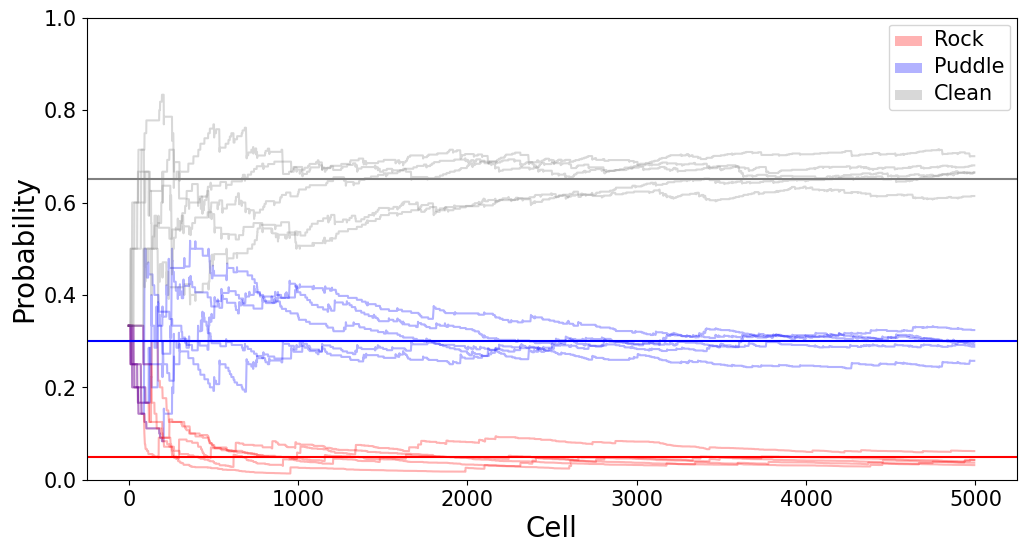

In [64]:
matplotlib.rc_file_defaults()
ax = sns.set_style(style=None, rc=None )

fig, ax = plt.subplots(figsize=(12,6))

df_env_state, _ = simulate(5000)

plot_ = sns.lineplot(df_env_state['cell'], df_env_state['prp'], sort = False, color='r', alpha=0.3)
sns.lineplot(df_env_state['cell'], df_env_state['ppp'], sort = False, color='b', alpha=0.3)
sns.lineplot(df_env_state['cell'], df_env_state['pcp'], sort = False, color='gray', alpha=0.3)

for i in np.arange(1,5):
    print(i)
    
    df_env_state, _ = simulate(5000)

    sns.lineplot(df_env_state['cell'], df_env_state['prp'], sort = False, color='r', alpha=0.3)
    sns.lineplot(df_env_state['cell'], df_env_state['ppp'], sort = False, color='b', alpha=0.3)
    sns.lineplot(df_env_state['cell'], df_env_state['pcp'], sort = False, color='gray', alpha=0.3)

plot_.axhline(0.05, color='r')
plot_.axhline(0.3, color='b')
plot_.axhline(0.65, color='gray')
#ax.xaxis.set_major_locator(plt.MaxNLocator(3))

ax.set_xlabel('Cell', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)
ax.tick_params(labelsize=15)


plt.ylim(0,1.0)

legend_elements = [Patch(facecolor='r', alpha=0.3,
                         label='Rock'), Patch(facecolor='b', alpha=0.3,
                         label='Puddle'), Patch(facecolor='gray', alpha=0.3,
                         label='Clean')]


ax.legend(handles=legend_elements)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text

plt.show()

plot_.figure.savefig("figs/env_state2.png")

1
2
3
4


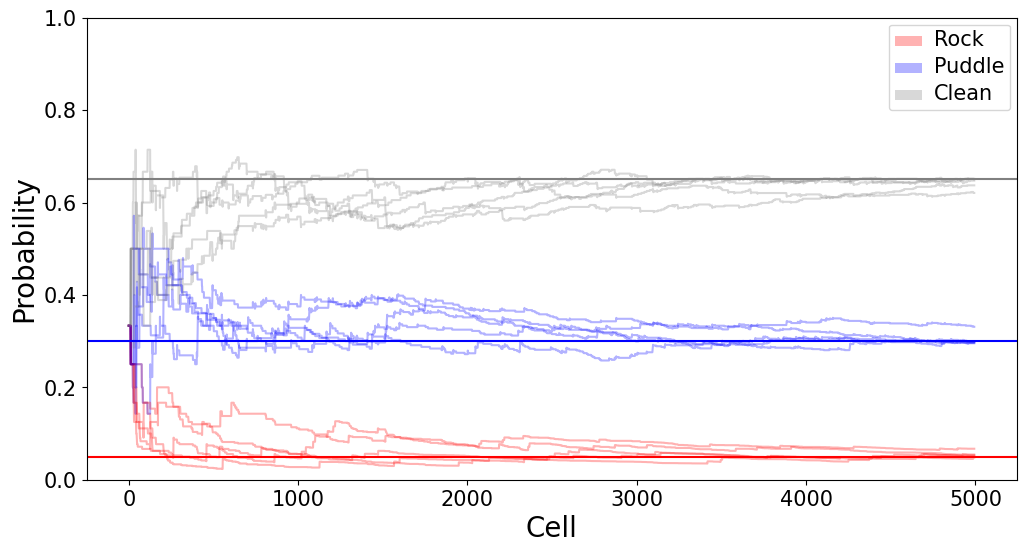

In [65]:
matplotlib.rc_file_defaults()
ax = sns.set_style(style=None, rc=None )

fig, ax = plt.subplots(figsize=(12,6))

df_env_state, _ = simulate(5000)

plot_ = sns.lineplot(df_env_state['cell'], df_env_state['prp'], sort = False, color='r', alpha=0.3)
sns.lineplot(df_env_state['cell'], df_env_state['ppp'], sort = False, color='b', alpha=0.3)
sns.lineplot(df_env_state['cell'], df_env_state['pcp'], sort = False, color='gray', alpha=0.3)

for i in np.arange(1,5):
    print(i)
    
    df_env_state, _ = simulate(5000)

    sns.lineplot(df_env_state['cell'], df_env_state['prp'], sort = False, color='r', alpha=0.3)
    sns.lineplot(df_env_state['cell'], df_env_state['ppp'], sort = False, color='b', alpha=0.3)
    sns.lineplot(df_env_state['cell'], df_env_state['pcp'], sort = False, color='gray', alpha=0.3)

plot_.axhline(0.05, color='r')
plot_.axhline(0.3, color='b')
plot_.axhline(0.65, color='gray')
#ax.xaxis.set_major_locator(plt.MaxNLocator(3))

ax.set_xlabel('Cell', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)
ax.tick_params(labelsize=15)


plt.ylim(0,1.0)

legend_elements = [Patch(facecolor='r', alpha=0.3,
                         label='Rock'), Patch(facecolor='b', alpha=0.3,
                         label='Puddle'), Patch(facecolor='gray', alpha=0.3,
                         label='Clean')]


ax.legend(handles=legend_elements)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text

plt.show()

plot_.figure.savefig("figs/env_state3.png")

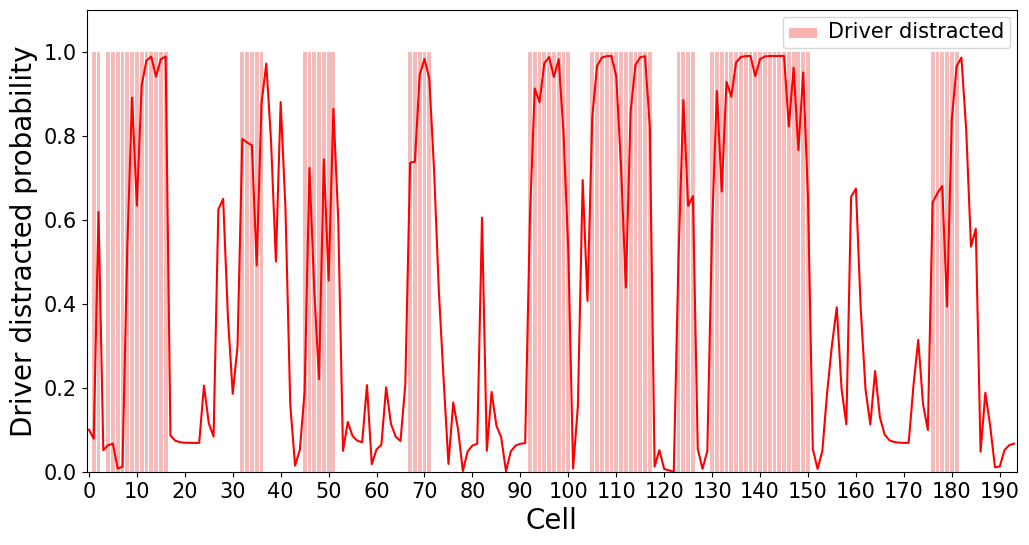

In [53]:
matplotlib.rc_file_defaults()
ax = sns.set_style(style=None, rc=None )

fig, ax = plt.subplots(figsize=(12,6))

_, df_driver_state = simulate(200)

plot_ = sns.lineplot(df_driver_state['cell'], df_driver_state['prob'], sort = False, color='r')
sns.barplot(data = df_driver_state, x='cell', y='true_state', color='r', alpha=0.3)

#ax.xaxis.set_major_locator(plt.MaxNLocator(3))

ax.set_xlabel('Cell', fontsize=20)
ax.set_ylabel('Driver distracted probability', fontsize=20)
ax.tick_params(labelsize=15)

new_ticks = [i.get_text() for i in plot_.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
plt.ylim(0,1.1)

legend_elements = [Patch(facecolor='r', alpha=0.3,
                         label='Driver distracted')]

ax.legend(handles=legend_elements)

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text


plt.show()

plot_.figure.savefig("figs/driver_state.png")

# Simulation aggregated results - Histograms

In [2]:
df = pd.read_csv("results/sim2.csv")
path = "figs/sim2/"

In [3]:
df.head()

,prop_manual,n_RtI,n_emergency,prop_rejected_RtI,avg_len_man,state_warnings,rock_warnings,puddle_warnings,crashes,skids,utility
0,0.137688,32,3,0.627907,6.850000,230,31,88,7,4,-0.354070
1,0.126633,28,0,0.600000,7.000000,235,20,85,3,2,0.065025
2,0.081407,16,0,0.636364,8.100000,250,11,49,0,2,0.365427
3,0.124623,35,2,0.520548,6.526316,257,12,81,1,2,0.262412
4,0.117588,31,1,0.515625,5.571429,274,12,66,2,3,0.157688


In [62]:
def plot_hist(df, x, xlab, path):
    
    matplotlib.rc_file_defaults()
    ax = sns.set_style(style=None, rc=None )
    fig, ax = plt.subplots(figsize=(12,6))
    plot_ = sns.distplot(df[x], bins=20, hist_kws={"rwidth":0.95,'edgecolor':'black', 'alpha':0.3},
                        norm_hist=False, kde=False)
    ax.set_xlabel(xlab, fontsize=20)
    ax.set_ylabel('Count', fontsize=20)
    ax.tick_params(labelsize=15)
    '''
    for bar in plot_.patches:
        h = bar.get_height()
        if h != 0:
            plot_.text(bar.get_x() + bar.get_width() / 2,
                      h,
                      f'{h:.0f}\n',
                      ha='center',
                      va='center')
    '''
    plot_.figure.savefig(path)

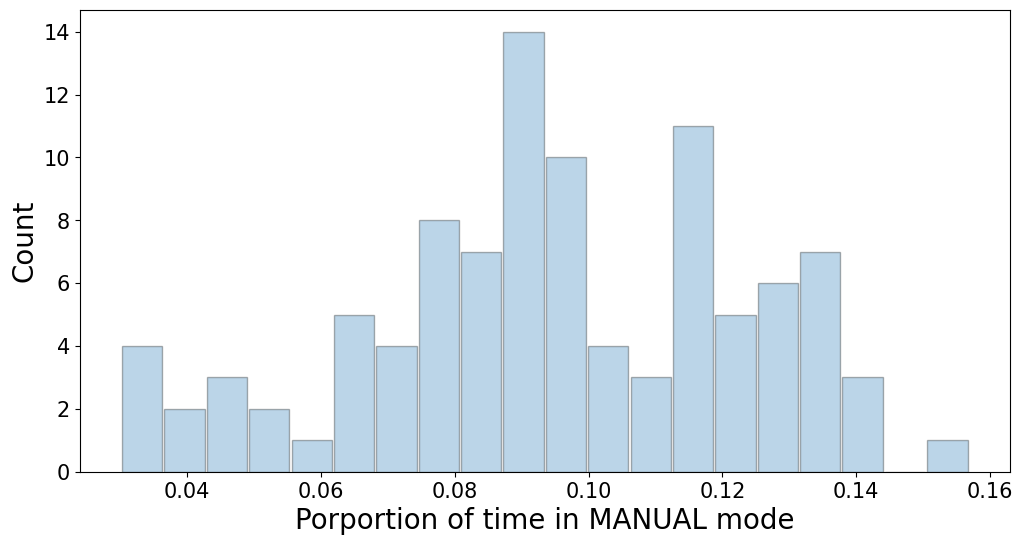

In [63]:
plot_hist(df, 'prop_manual', 'Porportion of time in MANUAL mode', path + 'prop_time_man_test.png')

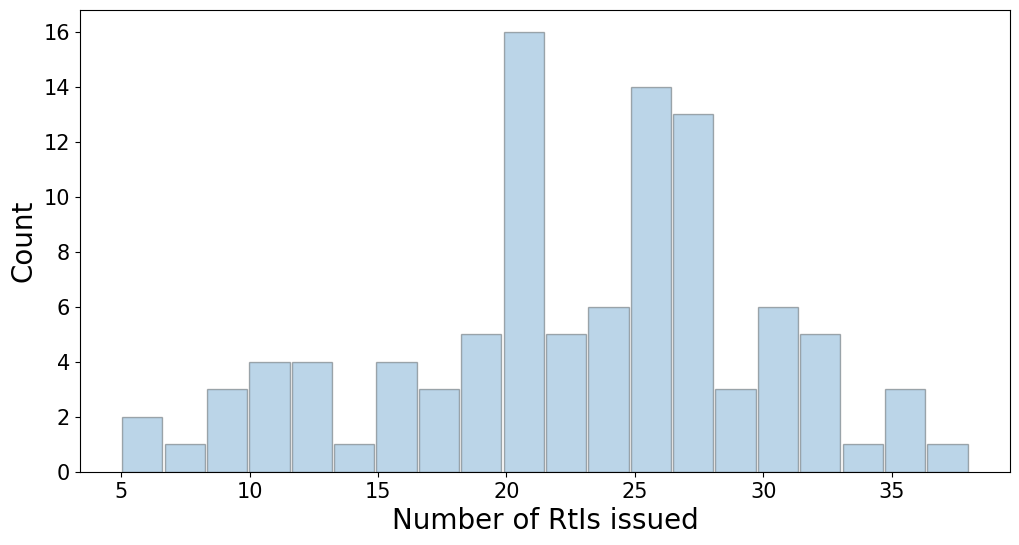

In [64]:
plot_hist(df, 'n_RtI', 'Number of RtIs issued', path + 'n_RtI_test.png')

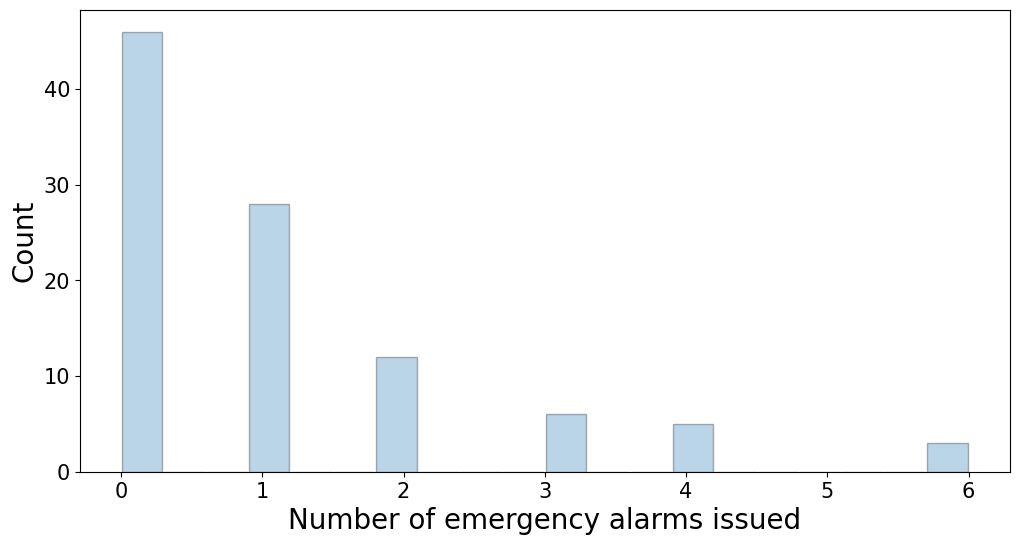

In [65]:
plot_hist(df, 'n_emergency', 'Number of emergency alarms issued', path + 'n_emergency_test.png')

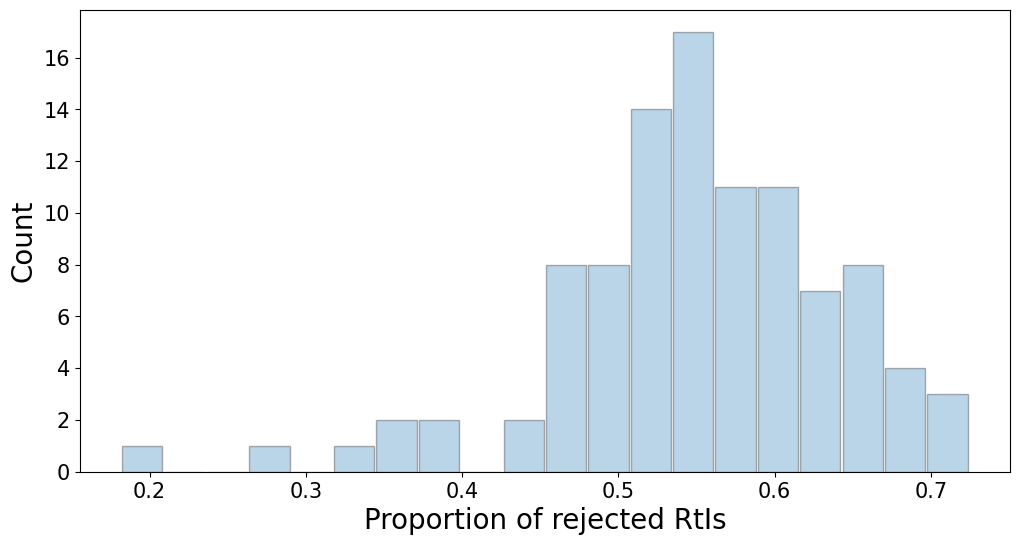

In [66]:
plot_hist(df, 'prop_rejected_RtI', 'Proportion of rejected RtIs', path + 'prop_rejected_RtI.png')

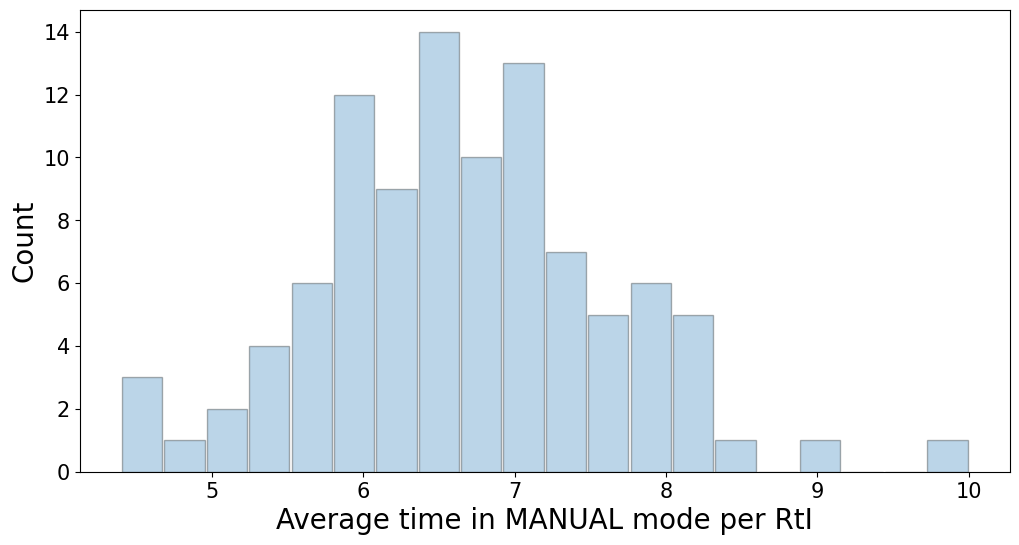

In [67]:
plot_hist(df, 'avg_len_man', 'Average time in MANUAL mode per RtI', path + 'avg_len_man_test.png')

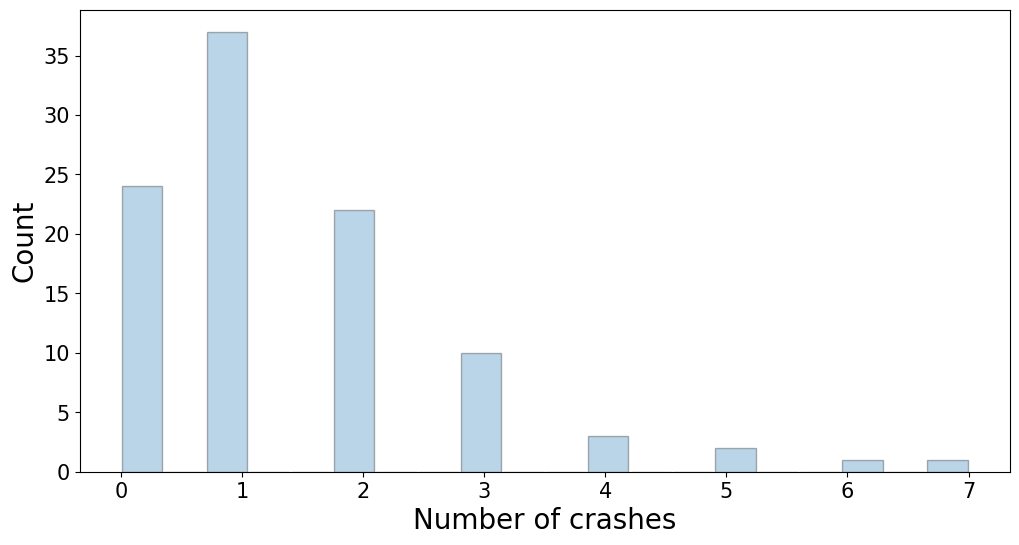

In [68]:
plot_hist(df, 'crashes', 'Number of crashes', path + 'crashes.png')

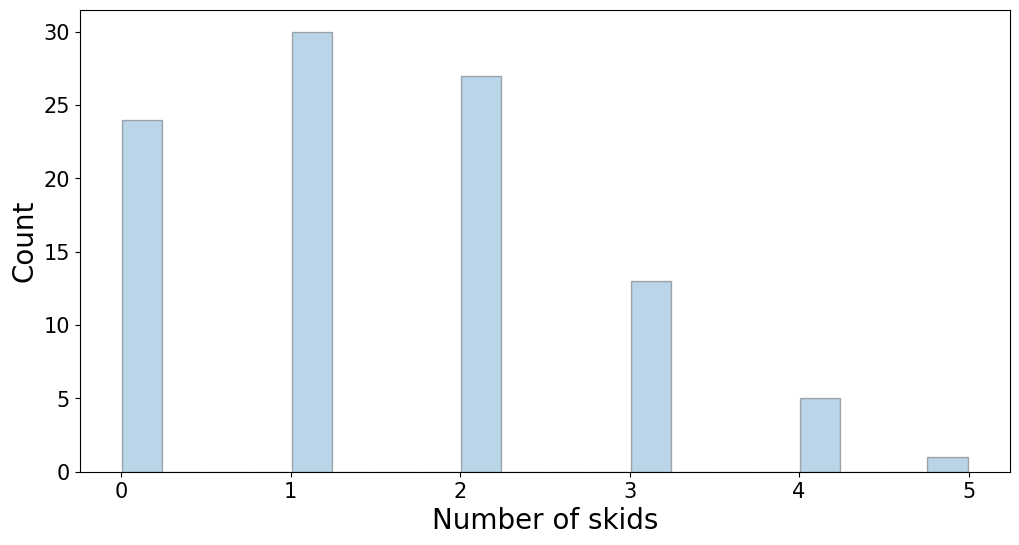

In [69]:
plot_hist(df, 'skids', 'Number of skids', path + 'skids.png')

# Simulation aggregated results - Boxplots

In [70]:
def plot_bp(df, y, ylab, path=None):
    
    matplotlib.rc_file_defaults()
    ax = sns.set_style(style=None, rc=None )
    fig, ax = plt.subplots(figsize=(10,10))
    plot_ = sns.boxplot(y=df[y])
    #sns.swarmplot(y=df[y], color=".25")
    ax.set_ylabel(ylab, fontsize=20)
    ax.tick_params(labelsize=15)
    if path is not None:
        plot_.figure.savefig(path)

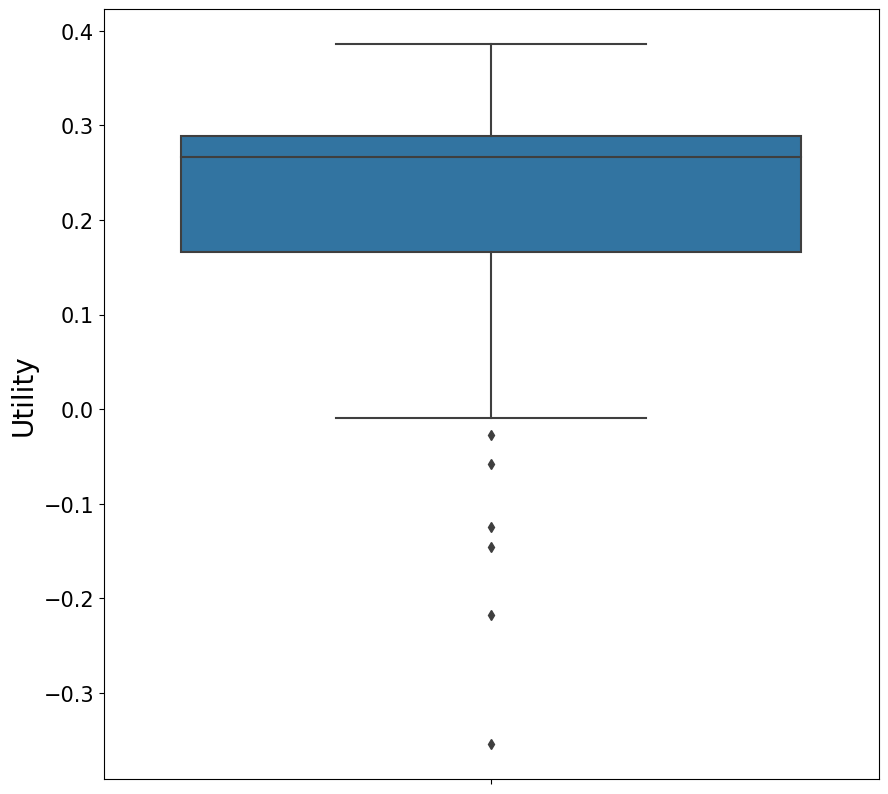

In [71]:
plot_bp(df, 'utility', 'Utility', path + 'utility_bp.png')

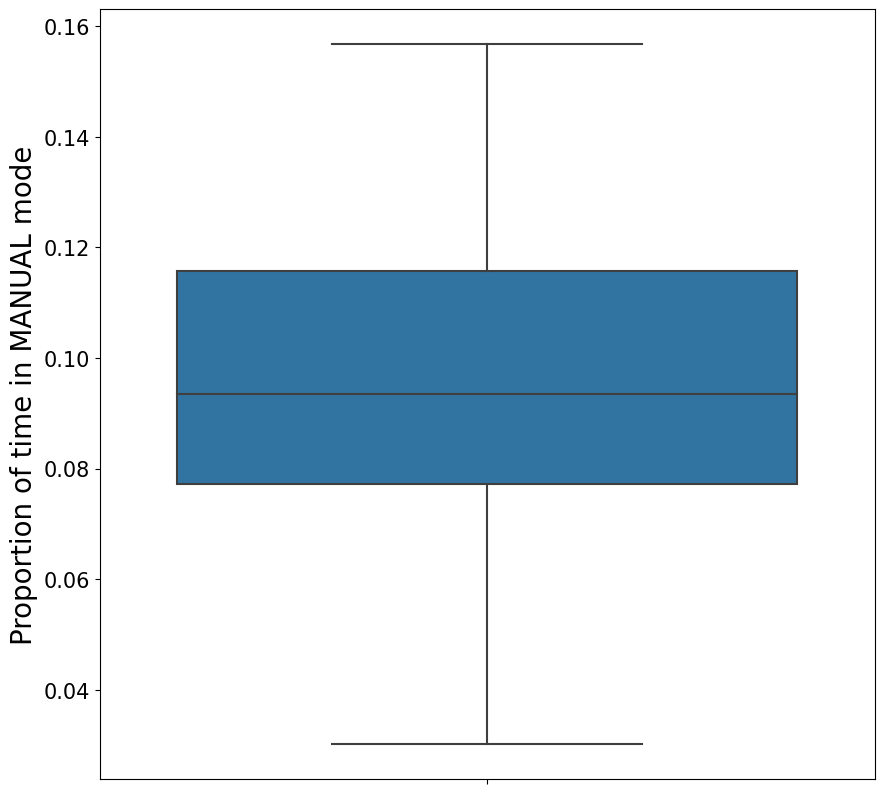

In [72]:
plot_bp(df, 'prop_manual', 'Proportion of time in MANUAL mode', path + 'prop_manual.png')

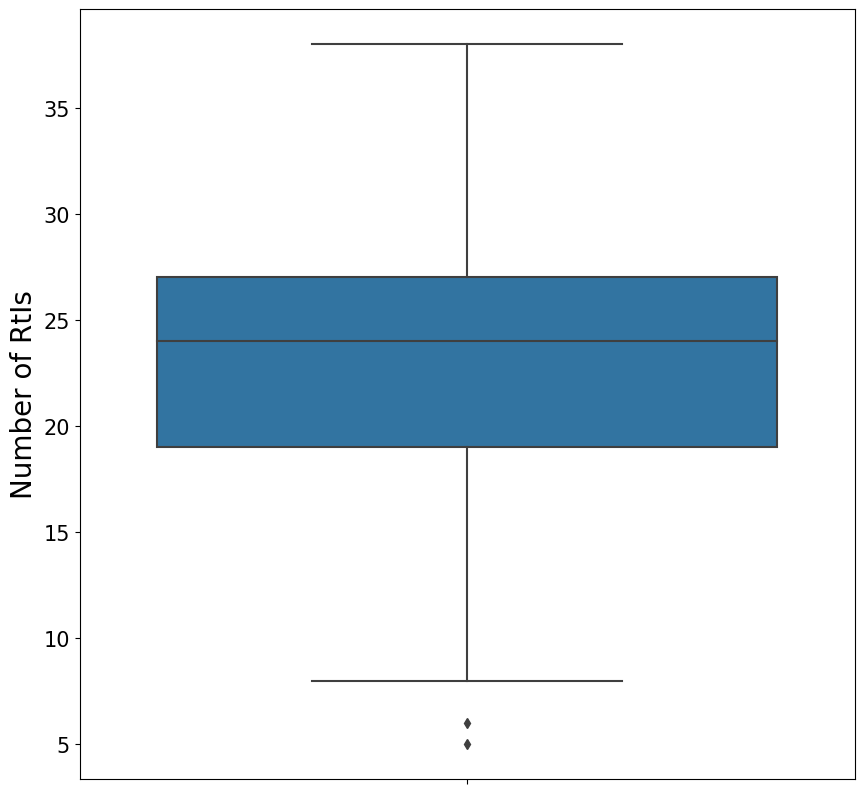

In [73]:
plot_bp(df, 'n_RtI', 'Number of RtIs', path + 'n_RtI.png')

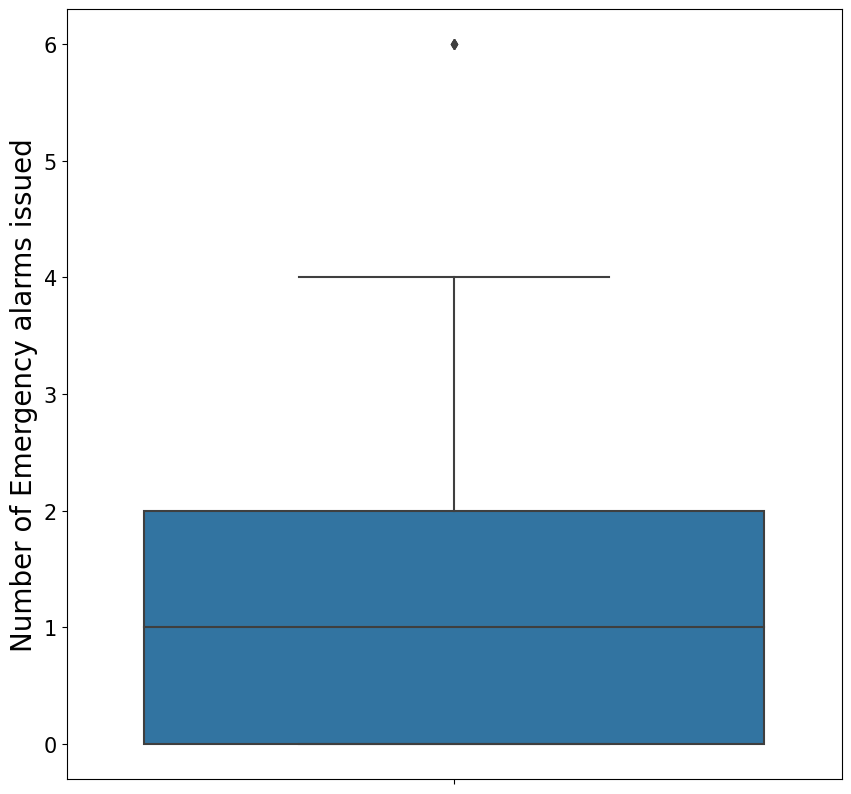

In [74]:
plot_bp(df, 'n_emergency', 'Number of Emergency alarms issued', path + 'n_emergency.png')